In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
rawdata = pd.read_csv('C:\\Users\\Keerthi\\Downloads\\Wholesale customers data.csv')
rawdata.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
X = rawdata.iloc[:,2:8]

In [5]:
X = pd.DataFrame(X)

In [6]:
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [7]:
from sklearn.preprocessing import normalize
X = normalize(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


# K-means

In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [10]:
y_km

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,

In [11]:
centroids = km.cluster_centers_

In [12]:
centroids

array([[0.86957306, 0.17495423, 0.2260608 , 0.22490371, 0.05007507,
        0.07400152],
       [0.26408303, 0.47922149, 0.66190661, 0.13429499, 0.25144995,
        0.10540875]])

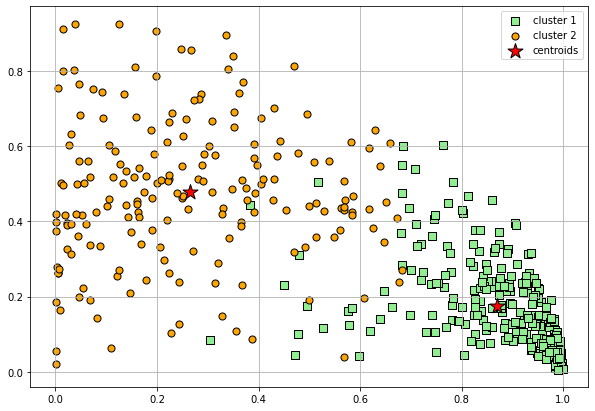

In [13]:
# plot the 2 clusters
plt.figure(figsize=(10, 7))
plt.scatter(
    X.values[y_km == 0, 0], X.values[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X.values[y_km == 1, 0], X.values[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# H-Clustering

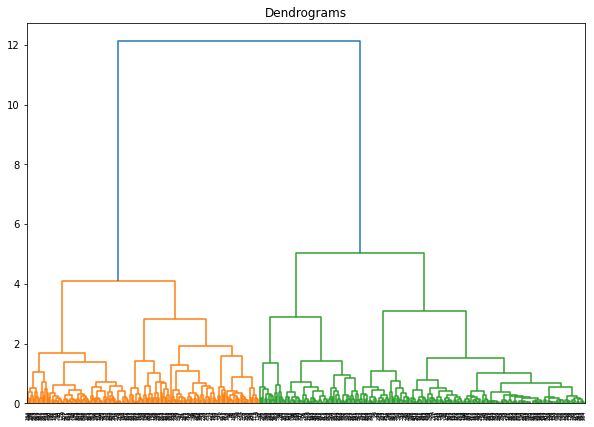

In [14]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(X)

In [17]:
X['Cluster No'] = clusters

In [30]:
X.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster No
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809,1
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286,1
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619,1
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494,0
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294,0
5,0.684944,0.600972,0.372997,0.048462,0.130615,0.105583,1
6,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056,0
7,0.548036,0.358368,0.681593,0.120685,0.240141,0.185547,1
8,0.625457,0.382637,0.649477,0.044578,0.179991,0.078667,1
9,0.250143,0.462010,0.786371,0.048271,0.309242,0.087379,1


In [29]:
X.columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','Cluster No']

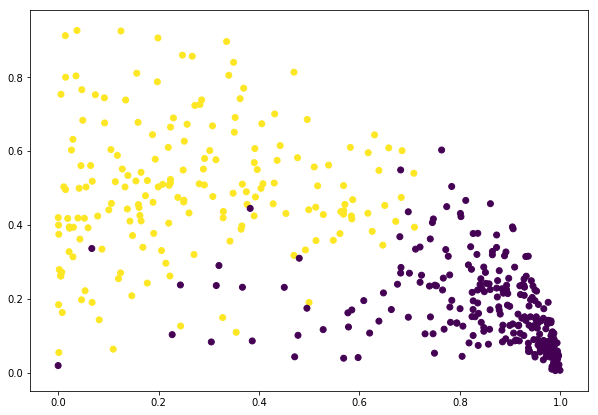

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(X['Fresh'],X['Milk'], c=cluster.labels_)

# K-Means 2

In [35]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=2)

In [51]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [53]:
pd.DataFrame(centroids)

,0,1,2,3,4,5,6
0,0.267848,0.498816,0.660987,0.107786,0.256933,0.108024,1.000000e+00
1,0.850400,0.169289,0.238587,0.241312,0.051656,0.072995,-1.443290e-15


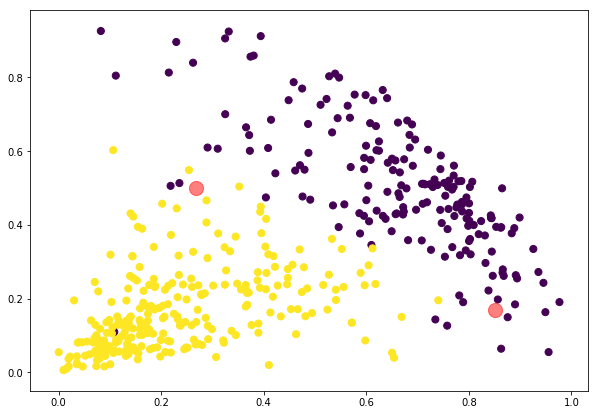

In [54]:
plt.figure(figsize=(10, 7))
plt.scatter(X['Grocery'],X['Milk'], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)